# Train and Data Analysis

- Use Jupyter Notebook for training
- Train on GCP to use Cuda

In [1]:
from Settings import Settings
Settings.print_count = 5 # print 5 count for 1 epoch
Settings.epoch_num = 50
Settings.batch_size = 50
Settings.seq_size = 100
Settings.learning_rate = 1e-4  # use larger learning rate

In [2]:
from DataLoader import torch_dataset_loader
from TextCNN import Model
from Train import main_train
import json
import matplotlib.pyplot as plt

In [3]:
e_train_loader = torch_dataset_loader(Settings.e_train_path, Settings.batch_size, True, Settings.kwargs)
e_validation_loader = torch_dataset_loader(Settings.e_valid_path, Settings.batch_size, False, Settings.kwargs)
e_test_loader = torch_dataset_loader(Settings.e_test_path, Settings.batch_size, False, Settings.kwargs)

## Train Text CNN Model

In [4]:
txtModel = Model()
print(txtModel)

Model(
  (embedding): Embedding(300997, 512, padding_idx=1)
  (convs): ModuleList(
    (0): Conv2d(1, 256, kernel_size=(2, 512), stride=(1, 1))
    (1): Conv2d(1, 256, kernel_size=(3, 512), stride=(1, 1))
    (2): Conv2d(1, 256, kernel_size=(4, 512), stride=(1, 1))
  )
  (dropout): Dropout(p=0.6)
  (fc): Linear(in_features=768, out_features=14, bias=True)
  (softmax): Softmax()
)


In [ ]:
accu = main_train(txtModel, e_train_loader, e_validation_loader, "e_train.json", "e_model.h5")

Epoch  1 |  64/323 batches | 32.30ms/ batch | BCE: 0.2670 | Accuracy: 15.53% |
Epoch  1 | 128/323 batches | 31.74ms/ batch | BCE: 0.2533 | Accuracy: 19.91% |
Epoch  1 | 192/323 batches | 31.54ms/ batch | BCE: 0.2450 | Accuracy: 22.92% |
Epoch  1 | 256/323 batches | 31.44ms/ batch | BCE: 0.2391 | Accuracy: 25.20% |
Epoch  1 | 320/323 batches | 31.38ms/ batch | BCE: 0.2344 | Accuracy: 26.72% |
---------------------------------------------------------------------------------------------------
End of training epoch   1 | time: 10.16s | BCE: 0.2341 | Accuracy: 26.85% |
End of validation epoch   1 | time:  0.49s | BCE: 0.1740 | Accuracy: 49.57% |
---------------------------------------------------------------------------------------------------
***Found Best Training Model***
***Best Validation Model Found and Saved***
---------------------------------------------------------------------------------------------------
Epoch  2 |  64/323 batches | 31.96ms/ batch | BCE: 0.1969 | Accuracy: 38.97

---------------------------------------------------------------------------------------------------
Epoch 10 |  64/323 batches | 32.03ms/ batch | BCE: 0.1059 | Accuracy: 71.16% |
Epoch 10 | 128/323 batches | 31.66ms/ batch | BCE: 0.1062 | Accuracy: 71.08% |
Epoch 10 | 192/323 batches | 31.55ms/ batch | BCE: 0.1063 | Accuracy: 70.91% |
Epoch 10 | 256/323 batches | 31.50ms/ batch | BCE: 0.1071 | Accuracy: 70.86% |
Epoch 10 | 320/323 batches | 31.47ms/ batch | BCE: 0.1078 | Accuracy: 70.47% |
---------------------------------------------------------------------------------------------------
End of training epoch  10 | time: 10.19s | BCE: 0.1078 | Accuracy: 70.43% |
End of validation epoch  10 | time:  0.50s | BCE: 0.1173 | Accuracy: 68.21% |
---------------------------------------------------------------------------------------------------
***Found Best Training Model***
---------------------------------------------------------------------------------------------------
Epoch 11 |  64/323 

Epoch 19 |  64/323 batches | 31.94ms/ batch | BCE: 0.0738 | Accuracy: 80.62% |
Epoch 19 | 128/323 batches | 31.47ms/ batch | BCE: 0.0746 | Accuracy: 80.33% |
Epoch 19 | 192/323 batches | 31.31ms/ batch | BCE: 0.0744 | Accuracy: 80.63% |
Epoch 19 | 256/323 batches | 31.22ms/ batch | BCE: 0.0744 | Accuracy: 80.88% |
Epoch 19 | 320/323 batches | 31.18ms/ batch | BCE: 0.0750 | Accuracy: 80.78% |
---------------------------------------------------------------------------------------------------
End of training epoch  19 | time: 10.09s | BCE: 0.0750 | Accuracy: 80.75% |
End of validation epoch  19 | time:  0.50s | BCE: 0.1117 | Accuracy: 69.38% |
---------------------------------------------------------------------------------------------------
***Found Best Training Model***
---------------------------------------------------------------------------------------------------
Epoch 20 |  64/323 batches | 31.80ms/ batch | BCE: 0.0694 | Accuracy: 82.44% |
Epoch 20 | 128/323 batches | 31.37ms/ ba

## Model Analysis

In [5]:
with open(Settings.log_save_folder + "s_train.json", "r") as file:
    log1 = json.load(file)
with open(Settings.log_save_folder + "s_train20.json", "r") as file:
    log2 = json.load(file)


In [6]:
log = dict()
for key in log1:
    log[key] = log1.get(key) + log2.get(key)


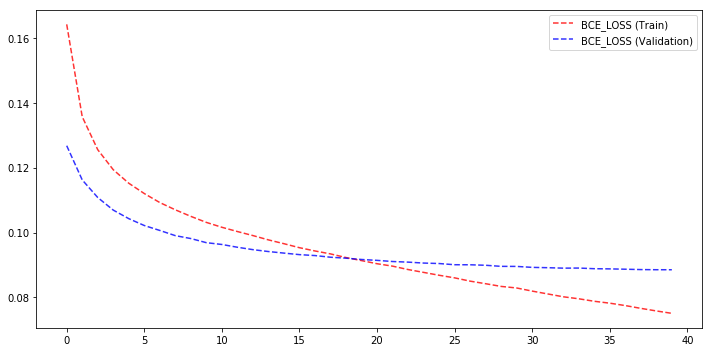

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(log['train_loss'], '--', color=(1,0,0,0.8), label='BCE_LOSS (Train)')
plt.plot(log['valid_loss'], '--', color=(0,0,1,0.8), label='BCE_LOSS (Validation)')
plt.tight_layout()
plt.legend(loc="best")
plt.show()

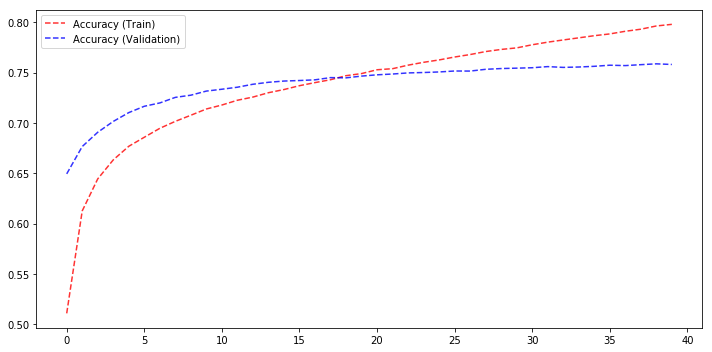

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(log['train_accu'], '--', color=(1,0,0,0.8), label='Accuracy (Train)')
plt.plot(log['valid_accu'], '--', color=(0,0,1,0.8), label='Accuracy (Validation)')
plt.tight_layout()
plt.legend(loc="best")
plt.show()

## Test Model on test set

In [10]:
from Train import validate_test
import torch

In [12]:
txtModel = Model()
txtModel.cuda().load_state_dict(torch.load(Settings.model_save_folder + 's_model20.h5'))
validate_test(model=txtModel, epoch=0, use_loader=s_test_loader)

End of validation epoch   0 | time: 13.33s | BCE: 0.0891 | Accuracy: 75.66% |
---------------------------------------------------------------------------------------------------


(0.08911788533243613, 0.7565606806986095)

## Confusion Matrix

In [13]:
from Evaluate import Evaluator
model = Model()
evaluator = Evaluator(model, "s_model20.h5")

In [15]:
evaluator.record_matrix(s_test_loader, "s_confusion.json")

End of Matrix Record, Save file in ../LogSave/s_confusion.json
---------------------------------------------------------------------------------------------------


In [16]:
import numpy as np
import pandas as pd
import seaborn as sn

In [26]:
matrix = np.zeros((Settings.class_num, Settings.class_num))
with open(Settings.log_save_folder + 's_confusion.json', 'r') as f:
    tuple_list = json.load(f)

In [27]:
# we should contains same amount documents from each label when we are doing confusion matrix analysis
count = [100 for i in range(Settings.class_num)]

for point in tuple_list:
    i, j = point  # i is predict, j is real, record 100 point for each label
    if count[j] > 0:
        count[j] -= 1
        matrix[i][j] += 1

In [28]:
for i, line in enumerate(matrix):
    matrix[i] /= sum(matrix)
matrix = pd.DataFrame(matrix, index = [evaluator.index_to_label.get(str(i+1)) for i in range(Settings.class_num)],
                  columns = [evaluator.index_to_label.get(str(i+1)) for i in range(Settings.class_num)],)

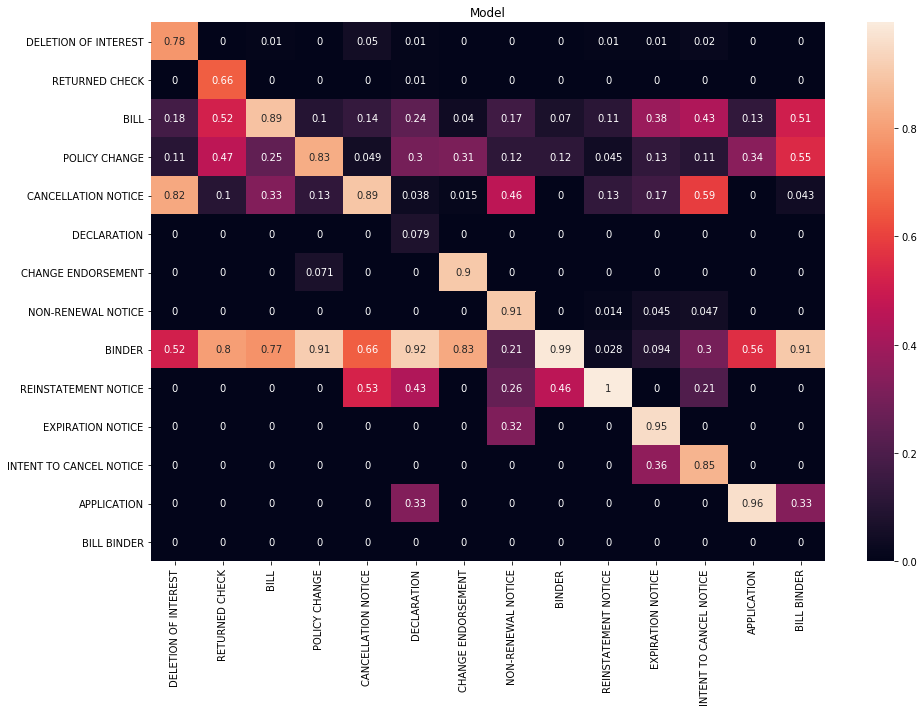

In [29]:
plt.figure(figsize=(14, 10))
plt.title('Model')
sn.heatmap(matrix, annot=True,)
plt.tight_layout()
plt.show()

## Conclusion
Current model has 81% accuracy on "chunk test"

# Test model on original set

In [33]:
import csv

csv_file = open(Settings.data_path, "r")
csv_reader = csv.reader(csv_file)

count = 0
right_count = 0
evaluator.model.cpu()

for line in csv_reader:
    label, doc = line
    pred_label, score = evaluator.label_predict(doc)
    count += 1
    if pred_label == label:
        right_count += 1

csv_file.close()
print(count, right_count)

62204 55862


In [34]:
right_count/ count

0.8980451417915246

# Current Model Result

- 89% on full length document
- 81% on chunks